# Naive Bayes
adalah sebuah algoritma machine learning tipe supervised - ada fitur, ada target yang menggunakan konsep hitung hitungan likelihood (probabilitas)

## Case Study
kita gunakan data airbnb dari Kaggle: https://www.kaggle.com/datasets/dipeshkhemani/airbnb-cleaned-europe-dataset

dari data ini, kita akan membuat model classification yang bisa memprediksi apakah seorang host "superhost" atau "bukan superhost" - ada 2 kategori.

In [25]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import naive bayes model dari sklearn
from sklearn.naive_bayes import GaussianNB

# encoding - mengubah data text categorical jadi numeric
from sklearn.preprocessing import LabelEncoder

# split train dan test data
from sklearn.model_selection import train_test_split

# evaluasi model classification
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# 1. import data
df_abnb = pd.read_csv("../dataset/Aemf1.csv")
df_abnb.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [3]:
df_abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

untuk case study kali ini, kita akan gunakan 7 kolom pertama sebagai fitur (input). Lalu kolom ke-8 "Superhost" sebagai targetnya.

model kita akan menerima 7 angka sebagai input dan membuat prediksi 1 angka (1 superhost, 0 bukan superhost)

--- data ini sudah di clean dari missing dan invalid values, juga sudah dibuat tipe data sesuai, jadi kita skip step2 itu

kita lanjut ke encoding, lalu split data, baru latih model naive bayes nya

In [5]:
# pisahin data fitur (X) dan target (y)

X = df_abnb.iloc[:, 0:7]
X.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0


In [16]:
y = df_abnb.loc[:, "Superhost"]
y.head()

0    False
1    False
2    False
3    False
4     True
Name: Superhost, dtype: bool

target perlu di encode juga

In [21]:
# encoding
# perhatikan ada fitur2 yang data type nya masih non-numeric, kita convert jadi numeric menggunakan LabelEncoder

# siapin copy data kita
X_encoded = X.copy()

# buat encoder
le = LabelEncoder()

# untuk setiap kolom data yang mau di encode, kita replace data awal di df_abnb_encoded dengan versi encoded nya
kolom_yang_perlu_di_encode = ["City", "Day", "Room Type", "Shared Room", "Private Room"]

for col in kolom_yang_perlu_di_encode:
    X_encoded.loc[:, col] = le.fit_transform(X.loc[:, col])

    print(col, le.classes_)

X_encoded.head()

City ['Amsterdam' 'Athens' 'Barcelona' 'Berlin' 'Budapest' 'Lisbon' 'Paris'
 'Rome' 'Vienna']
Day ['Weekday' 'Weekend']
Room Type ['Entire home/apt' 'Private room' 'Shared room']
Shared Room [False  True]
Private Room [False  True]


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity
0,0,194.033698,0,1,0,1,2.0
1,0,344.245776,0,1,0,1,4.0
2,0,264.101422,0,1,0,1,2.0
3,0,433.529398,0,1,0,1,4.0
4,0,485.552926,0,1,0,1,2.0


In [22]:
# kita perlu encode targetnya juga
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("Superhost", le.classes_)
print(y_encoded[:5])

Superhost [False  True]
[0 0 0 0 1]


kita split data jadi training dan testing data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, random_state=10, test_size=0.2)
print(X_train.shape, X_test.shape)

(33371, 7) (8343, 7)


kita latih model

In [24]:
# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

GaussianNB()

In [26]:
# evaluasi

# persiapan function untuk visualisasi confusion matrix dan classification report
def visualizeCM(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    n = len(cm) # jumlah label/ kategori

    fig, ax = plt.subplots(figsize=(n+1, n+1))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=range(n))
    ax.set_xlabel("predicted")
    ax.yaxis.set(ticks=range(n))
    ax.set_ylabel("actual")
    ax.set_ylim( n - 0.5, -0.5)
    for i in range(n):
        for j in range(n):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize = 20)
    plt.title("Confusion Matrix")
    plt.show()
    
    print(classification_report(y_test, y_pred))

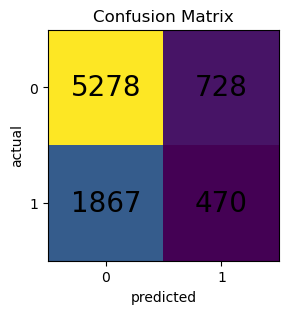

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      6006
           1       0.39      0.20      0.27      2337

    accuracy                           0.69      8343
   macro avg       0.57      0.54      0.53      8343
weighted avg       0.64      0.69      0.65      8343



In [27]:
visualizeCM(model_nb, X_test, y_test)

In [ ]:
# silahkan dicoba membuat model naive bayes. kalau ada error lsg kabarin. sampai jam 20.00